***Dragon Real Estate Price Prediction***

In [ ]:
#importing necessary packages

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Loading Dataset
medv= pd.read_csv("/content/data.csv")

In [ ]:
#Display Top 5 Entries of Dataset
medv.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
medv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


*Total variables 13*

*All the features are numeric*

**RM** *feature contain 5 NAN values*

In [ ]:
medv.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
medv.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**1. Feature RM contains 5 nan values**

**2. CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)**
   **is binary classified varaible**

In [ ]:
medv.drop_duplicates(inplace=True)

In [ ]:
medv["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

Distribution of 0 and 1 value in **CHAS** variable is very imbalance.

**Given dummy varaible represents whether property located near River CHARLES or not. This feature might be crucial in determinig the Property price. Therefore, we will use Stratified trai/test Sampling to prevent uneven distrubutiuon**


_________________________________________________________________________________________________________

**Testing significance of feature CHAS statistically by T-TEST**

**Hypotheses**
>Hₒ:- The mean property price is the same for locations near and not near the
      Charles River.

>Hₐ:- There is a significant difference in the mean property prices between
      locations near the Charles River and those not near the Charles River.

**Considering Threshold Level :- 0.05**

In [ ]:
print(f"Mean of value of owner-occupied homes in $1000 is {medv['MEDV'].mean()}")
print(f"Median of value of owner-occupied homes in $1000 is {medv['MEDV'].median()}")

Mean of value of owner-occupied homes in $1000 is 22.532806324110677
Median of value of owner-occupied homes in $1000 is 21.2


In [ ]:
#sampling data in required group
chas_0= medv[medv["CHAS"]==0]["MEDV"]
chas_1= medv[medv["CHAS"]==1]["MEDV"]

In [ ]:
threshold = 0.05
from scipy.stats import ttest_ind

#perform T_TEST

t_test, p_value= ttest_ind(chas_0,chas_1)

print("T-TEST value is",t_test)
print("P  value is",p_value)

T-TEST value is -3.996437466090509
P  value is 7.390623170519905e-05


The T test value represent a sustainable difference.The negative sign indicates that the mean property price for locations not near the Charles River is lower than the mean for locations near the river.

 A very small p-value (7.390623170519905e-05, which is close to zero) suggests strong evidence against the null hypothesis



Number of null values in RM is 5

Mean of Average Number of rooms per dwelling is:- 6.28434131736527
Median of Average Number of rooms per dwelling is:- 6.208



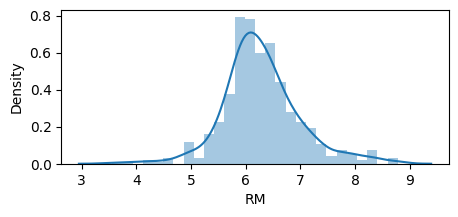

In [ ]:
print("Number of null values in RM is",medv["RM"].isnull().sum())

print()
print("Mean of Average Number of rooms per dwelling is:-",medv["RM"].mean())
print("Median of Average Number of rooms per dwelling is:-",medv["RM"].median())

print()
plt.figure(figsize=(5,2))
sns.distplot(medv["RM"])
plt.show()

Total null values are 5

Mean: 6.28434131736527

Median: 6.208

**We can observe a symmetrical distribution in our given feature that implies given set value tends cluster near around mean**

**Filling Null Values of AVERAGE ROOM PER DWELLING**

---



In [ ]:
#calculate mean of RM
RM_mean= medv["RM"].mean()

medv["RM"]= medv["RM"].fillna(RM_mean)

As the mean and median are very close (6.28 and 6.20), using either should not significantly impact the overall representation of the data. So, we will continue with filling NAN with Mean.

In [ ]:
print(medv.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


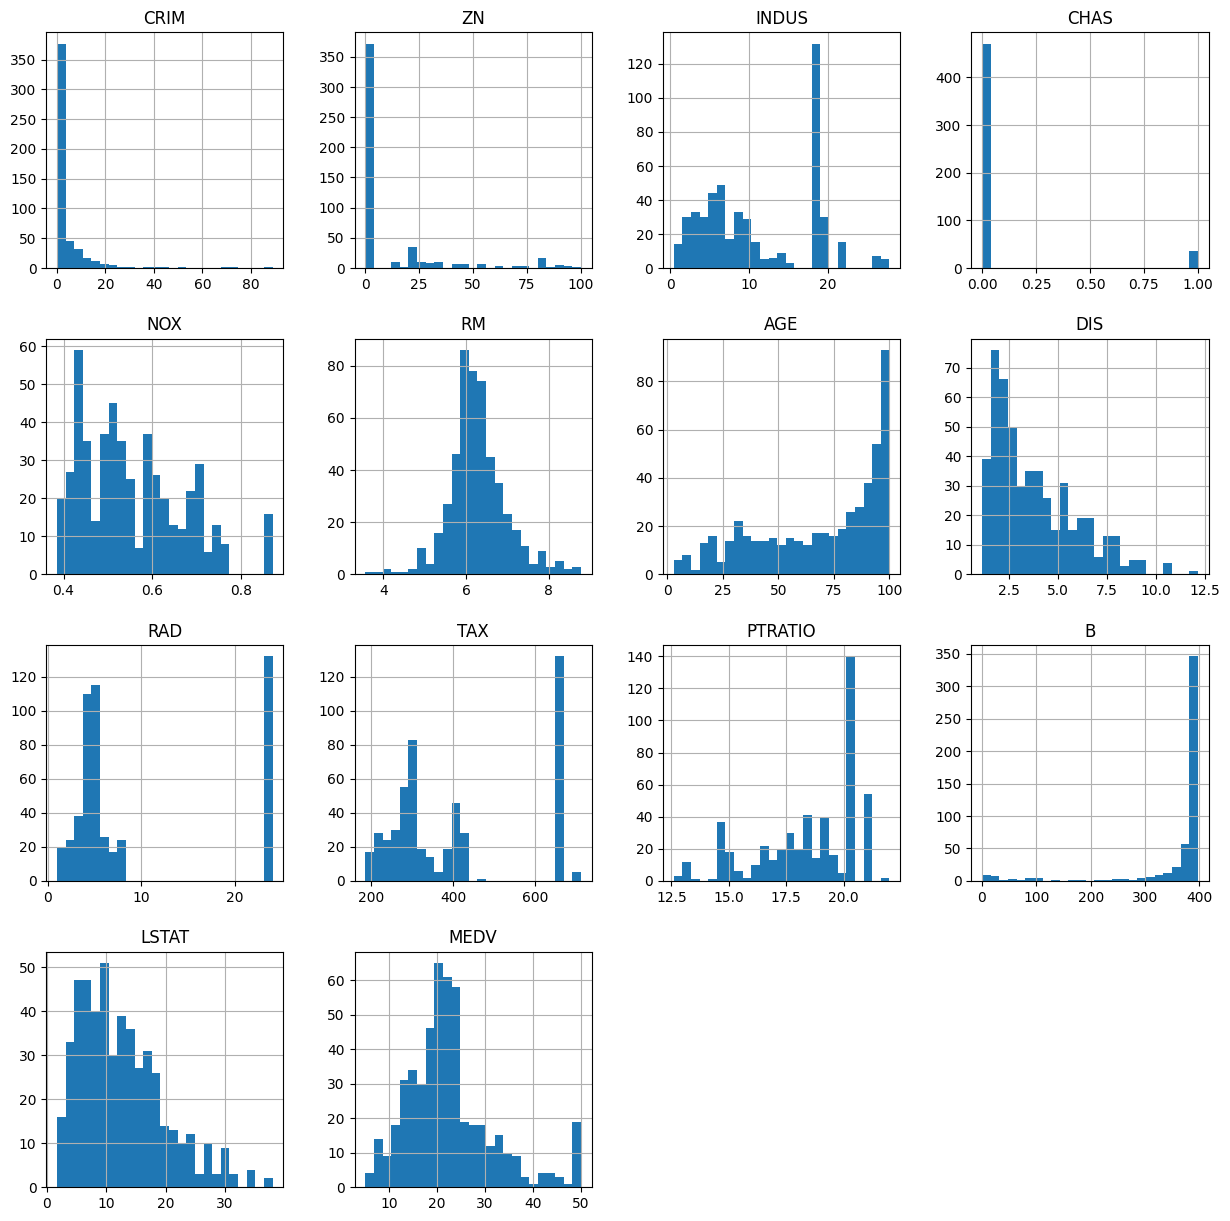

In [ ]:
#plotting histogram as given all values are quantitative
medv.hist(bins=25,figsize=(15,15))
plt.show()

>The majority of the observations for the per capita crime rate (CRIM) are concentrated between 0 and 10, indicating that most towns have a relatively low crime rate.

>However, there are a few outliers with values around or near 70, suggesting that there are some towns with significantly higher crime rates compared to the majority.


>Approximately 60 houses in the dataset are nearly 100 years old, reflecting a cluster of older properties.

>There is a high concentration of houses aging between 80 to 90, indicating a significant portion of the owner-occupied units were built in that period.


>The target variable MEDV shows that most houses have values between $20,000 and $35,000 (given that one unit represents $1000).

>There is a notable observation that approximately 20 houses have a median value of $50,000, which might indicate a group of more expensive properties in the datase

>Overall, except few feature we can observe presence of more or less skewness in almost every varaible which confirm presence of outliers. Thus, Noramlising the the values will be better choice.

**Corelation Between Varaible**

In [ ]:
corr_matrix= medv.corr()

In [ ]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695375
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

The correlation coefficients range from -1 to 1, indicating the strength and direction of the linear relationship between the variables.

We can observe some higher and strong relationship between label variable(MEDV) and independent variable

High corelation between is observed in varaible **LSTAT, PTRATIO, RM** and label variable.

**Visulaizing some features Corelation between independent varaibles and label varaible by scattter matrix**

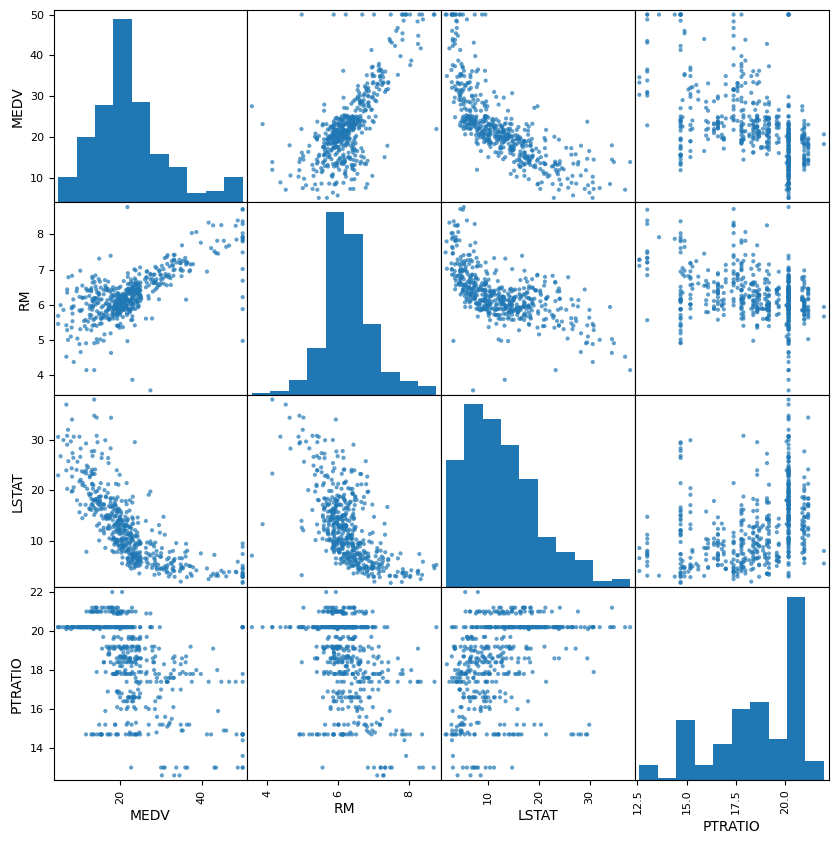

In [ ]:
from pandas.plotting import scatter_matrix
matrix=["MEDV","RM","LSTAT","PTRATIO"]
scatter_matrix(medv[matrix],figsize=(10,10),diagonal='hist',alpha=0.7)
plt.show()

##**Splittig the data in train and test**

In [ ]:
#User define function to split data into training andf testing set

"""def splitting(data,test_ratio):
  #to avoid continous shuffling and prevent overfitting of value in long run
  np.random.seed(42)

  #shuffling radomly data indices
  shuffle= np.random.permutation(len(data))
  test_size= int(len(data)* test_ratio)

  test_indices= shuffle[:test_size]
  train_indices= shuffle[test_size:]

  return data.iloc[test_indices], data.iloc[train_indices]
test_indices, train_indices= splitting(medv,0.2)
print("Lenght of train set",len(train_indices))
print("Lenght of test set",len(test_indices))"""

'def splitting(data,test_ratio):\n  #to avoid continous shuffling and prevent overfitting of value in long run\n  np.random.seed(42)\n\n  #shuffling radomly data indices\n  shuffle= np.random.permutation(len(data))\n  test_size= int(len(data)* test_ratio)\n\n  test_indices= shuffle[:test_size]\n  train_indices= shuffle[test_size:]\n\n  return data.iloc[test_indices], data.iloc[train_indices]\ntest_indices, train_indices= splitting(medv,0.2)\nprint("Lenght of train set",len(train_indices))\nprint("Lenght of test set",len(test_indices))'

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
sss= StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

#stratified splitting data based CHAS varaible
for train_index,test_index in sss.split(medv, medv["CHAS"]):
  train_set= medv.loc[train_index]
  test_set= medv.loc[test_index]

In [ ]:
print("Length of train set",len(train_set))
print("Length of test set",len(test_set))

Length of train set 404
Length of test set 102


In [ ]:
print("value counts of Training set\n",train_set["CHAS"].value_counts())
print()
print("Ratio of CHAS=0 by CHAS=1 in training set is ",len(train_set[train_set["CHAS"]==0])/len(train_set[train_set["CHAS"]==1]))

print("__________________________________________________________________________________________________________________________")

print("value counts of Testing set\n",test_set["CHAS"].value_counts())
print()
print("Ratio of CHAS=0 by CHAS=1 in testing set is ",len(test_set[test_set["CHAS"]==0])/len(test_set[test_set["CHAS"]==1]))

value counts of Training set
 0    376
1     28
Name: CHAS, dtype: int64

Ratio of CHAS=0 by CHAS=1 in training set is  13.428571428571429
__________________________________________________________________________________________________________________________
value counts of Testing set
 0    95
1     7
Name: CHAS, dtype: int64

Ratio of CHAS=0 by CHAS=1 in testing set is  13.571428571428571


In [ ]:
x_train, y_train= train_set.drop(columns=["MEDV"]), train_set["MEDV"]

In [ ]:
x_test, y_test= test_set.drop(columns=["MEDV"]), test_set["MEDV"]

##**Training Model**

In [ ]:
#importing model and evaluation metrics packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#WE will evaluate model Root Mean Squared Error of model(RSME)
from sklearn.metrics import mean_squared_error

In [ ]:
#Object of Trained Models class
lr= LinearRegression()
rfr= RandomForestRegressor()
svr= SVR()

In [ ]:
#fit training values to model
lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)
svr.fit(x_train,y_train)

SVR()

In [ ]:
lr_pred= lr.predict(x_test)
rfr_pred= rfr.predict(x_test)
svr_pred= svr.predict(x_test)

In [ ]:
#evaluating  model performance :- RSME
lr_mse= mean_squared_error(y_test,lr_pred)
rfr_mse= mean_squared_error(y_test,rfr_pred)
svr_mse= mean_squared_error(y_test,svr_pred)


print(f"RSME of Linear Regression = {np.sqrt(lr_mse)}")
print(f"RSME of Random Forest Regressor = {np.sqrt(rfr_mse)}")
print(f"RSME of Support Vector Regressor = {np.sqrt(svr_mse)}")

RSME of Linear Regression = 4.143346579423606
RSME of Random Forest Regressor = 3.0144355778389382
RSME of Support Vector Regressor = 7.280798504153879


Obtained values give an indication of the average magnitude of errors between the predicted and observed values, with lower values indicating better model performance.


Above results show that the **Random Forest Regressor** has the lowest **RMSE = 0.064245** among the three models, suggesting it performs better on the test data.

**Applying Cross_Validation Technique**

In [ ]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(rfr, x_train,y_train, cv=10, scoring='neg_mean_squared_error')

rsme_scores= np.sqrt(-scores)
print("Random Forest Regressor\n",rsme_scores)
print("Mean of scores:",rsme_scores.mean())
print("Standard Deviation of score: ",rsme_scores.std())

Random Forest Regressor
 [2.85205615 2.81856925 4.58788546 2.68917042 3.47738887 2.55328142
 4.56362297 3.31074397 3.12085    3.04649549]
Mean of scores: 3.302006400228155
Standard Deviation of score:  0.6889429488388238


In [ ]:
from sklearn.model_selection import cross_val_score
scores= cross_val_score(svr, x_train,y_train, cv=10, scoring='neg_mean_squared_error')

rsme_scores= np.sqrt(-scores)
print("Support Vector regressor\n",rsme_scores)
print("Mean of scores:",rsme_scores.mean())
print("Standard Deviation of score: ",rsme_scores.std())

Support Vector regressor
 [ 6.51487052  8.42097812  6.82117586  8.02906077 10.36322247  5.52332429
 11.76018564  9.71180134  5.03993038  9.74643255]
Mean of scores: 8.193098194120237
Standard Deviation of score:  2.097629033224482


**Random Forest Regressor:**
>Mean RSME: 3.30

>Standard Deviation of RSME: 0.69

**Support Vector Regressor:**
>Mean RSME: 8.19

>Standard Deviation of RSME: 2.10

**Reason for choosing Random Forest Regressor**

1.The primary reason for choosing the Random Forest Regressor is its lower mean RSME. A lower RSME indicates better predictive performance, and in this case, the Random Forest Regressor outperforms the Support Vector Regressor in terms of mean RSME.

2.Random Forest is an ensemble learning method that builds multiple decision trees and merges their predictions. This ensemble approach often leads to robust models that generalize well to unseen data.

3.Random Forests are less prone to overfitting, and their inherent randomness helps reduce model variance.

4.The mean RSME of approximately 3.30 indicates that, on average, the Random Forest Regressor's predictions deviate by around 3.30 units from the actual values.
The standard deviation of 0.69 suggests relatively consistent performance across different cross-validation folds.

In [ ]:
#importing joblib to save model
from joblib import dump, load
dump(rfr, 'Dragon.joblib')

['Dragon.joblib']

In [ ]:
from joblib import dump, load
rfr= load('Dragon.joblib')

In [ ]:
predicted= rfr.predict(x_test)
print("predicted values\n",predicted)
print()
print("Actaul value",y_test)

predicted values
 [24.912 11.394 25.336 21.661 18.523 15.254 20.206 14.758 31.703 41.652
 19.721 11.349 23.167 29.085 19.59  11.073 31.496 14.511 23.674 18.887
 20.189 17.655 18.522 22.062 18.231 31.651 16.019 33.048  8.902 33.145
 24.597 21.206 23.059 11.138 20.558 10.866 43.234 24.295 23.128 41.924
 23.998 29.556 20.199 20.585 18.592 33.388 44.945 20.028 20.139 21.565
 21.3   14.47  21.702 15.235 25.368 32.952 42.338 28.97  19.574 20.759
 46.444  9.461 19.336 24.893 15.047 33.036 19.608 18.294 19.089 34.973
 26.124 23.083 21.579 22.478 34.414 12.494 15.592 20.116 20.777 21.582
 22.601 21.111 14.473 23.325 20.723 20.863 13.879 21.311 21.686 23.462
 18.811 27.089  7.315 26.836 18.769 29.678 19.494 31.132 14.379 26.545
 21.416 20.429]

Actaul value 342    16.5
379    10.2
223    30.1
219    23.0
48     14.4
       ... 
88     23.6
466    19.0
52     25.0
121    20.3
218    21.5
Name: MEDV, Length: 102, dtype: float64
